In [31]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [32]:
sns.set(rc={"figure.figsize":( 12 , 8 )})

In [33]:
def get_d_prob(x):
    return np.array([0] + [1 / x] * x)

d4 = get_d_prob(4)
d6 = get_d_prob(6)
d8 = get_d_prob(8)
d10 = get_d_prob(10)
d12 = get_d_prob(12)
d20 = get_d_prob(20)


In [34]:
def sum_prob(prob_1, prob_2):
    res_prob = [0] * (len(prob_1) + len(prob_2) - 1)
    for i in range(len(prob_1)):
        for j in range(len(prob_2)):
            res_prob[i + j] += prob_1[i] * prob_2[j]
    return res_prob

def sum_probs(prob_1, prob_2, *probs):
    result = sum_prob(prob_1, prob_2)
    for prob in probs:
        result = sum_prob(result, prob)
    return result


In [76]:
def show(prob, label=None):
    sns.lineplot(x=range(1, len(prob)), y=prob[1:], label=label)

In [77]:
def advantage(prob):
    res = [0] * len(prob)
    for i in range(len(prob)):
        for j in range(len(prob)):
            res[max(i, j)] += prob[i] * prob[j]
    return res

def reroll12(prob):
    res = [0] * len(prob)
    for i in range(len(prob)):
        for j in range(len(prob)):
            if i in [0, 1]:
                res[j] += prob[i] * prob[j]
            else:
                res[i] += prob[i] * prob[j]
    return res

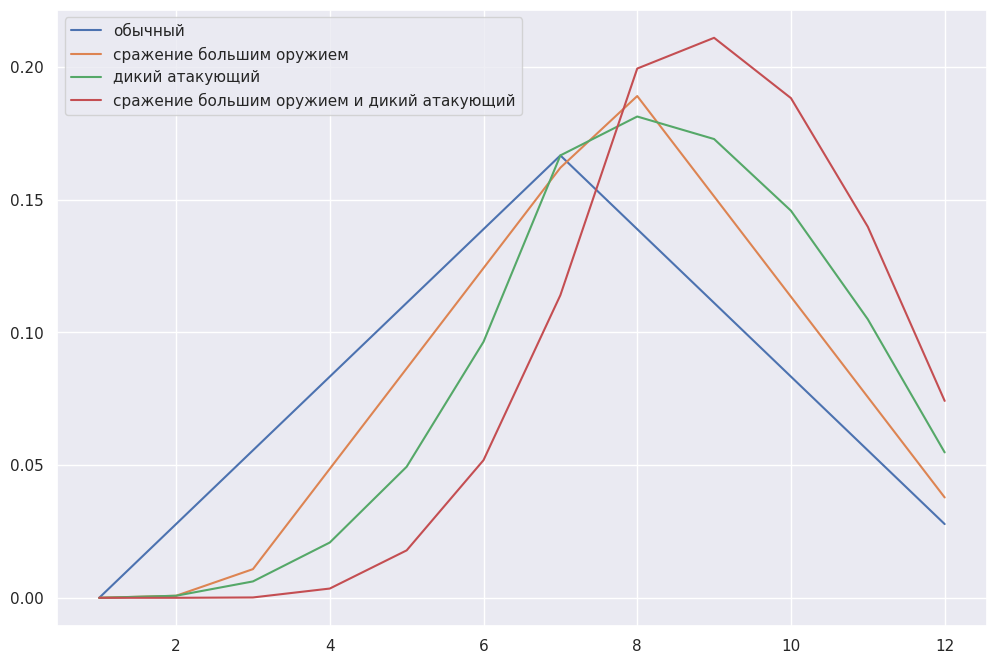

In [80]:
show(sum_probs(d6, d6), label="обычный")
show(sum_probs(reroll12(d6), reroll12(d6)), "сражение большим оружием")
show(advantage(sum_probs(d6, d6)), "дикий атакующий")
show(advantage(sum_probs(reroll12(d6), reroll12(d6))), "сражение большим оружием и дикий атакующий")

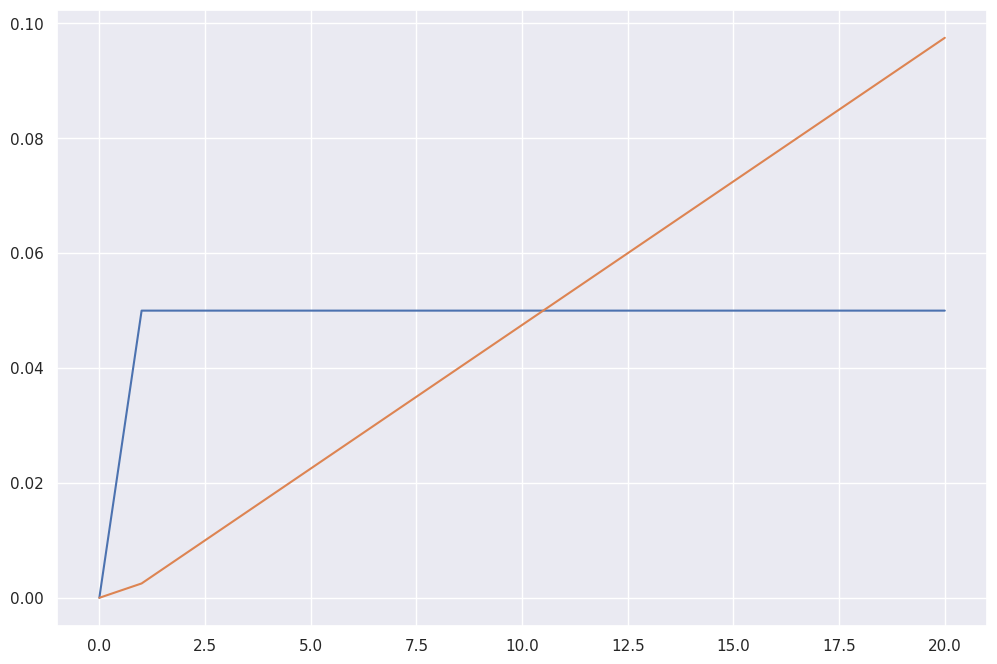

In [40]:
show(d20)
show(advantage(d20))

In [70]:
def p_kill(prob, hp):
    return sum(prob[hp:])

def prob_if_not_kill(prob, hp):
    return prob[:min(len(prob), hp)]


In [96]:
prob_win = 0
prob_lose = 0

prob_damage_1 = [1]
prob_damage_2 = [1]

player = 0

prob_not_end = 1

while prob_not_end > 0:
    print(prob_not_end)
    if player == 0:
        prob_damage_1 = sum_probs(prob_damage_1, d6 * prob_not_end)
        pkill = p_kill(prob_damage_1, 6)
        prob_win += pkill
        prob_not_end -= pkill
        prob_damage_1 = prob_if_not_kill(prob_damage_1, 6)
    else:
        prob_damage_2 = sum_probs(prob_damage_2, d6 * prob_not_end)
        pkill = p_kill(prob_damage_2, 6)
        prob_lose += pkill
        prob_not_end -= pkill
        prob_damage_2 = prob_if_not_kill(prob_damage_2, 6)
    player = 1 - player
print(prob_not_end)
print(prob_win, prob_lose)


1
0.8333333333333334
0.6944444444444444
0.308641975308642
0.16575217192501146
0.13910733976114004
0.13082524791626954
0.1301861815077898
0.12998850895722336
0.12998120875298905
0.12997895082027772
0.12997891810052298
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.12997890798039707
0.1

KeyboardInterrupt: 